In [1]:
!pip install music21

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from music21 import *
from matplotlib import pyplot as plt
from sklearn import svm, tree, naive_bayes, neighbors
import numpy as np
import graphviz
import data_loader as loader

In [3]:
composerNames = ["bach","trecento","debussy", "tchaikovsky"]
x_train, x_test,y_train, y_test = loader.load("pitches",composerNames)
print(len(x_train), len(x_test))

355 176


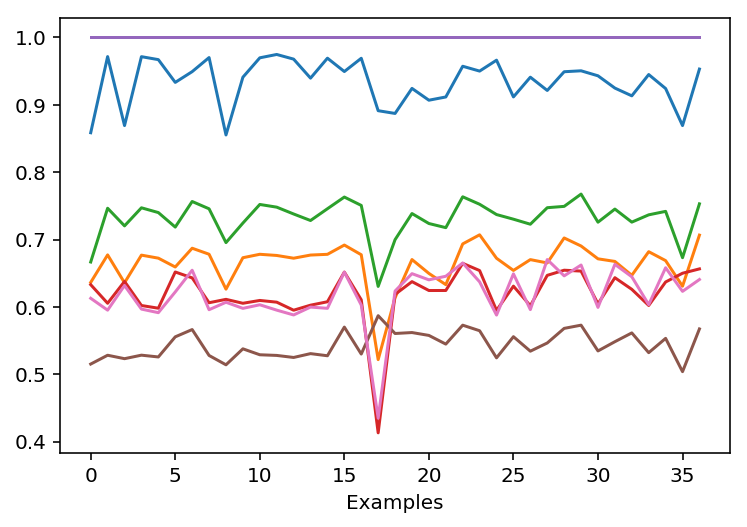

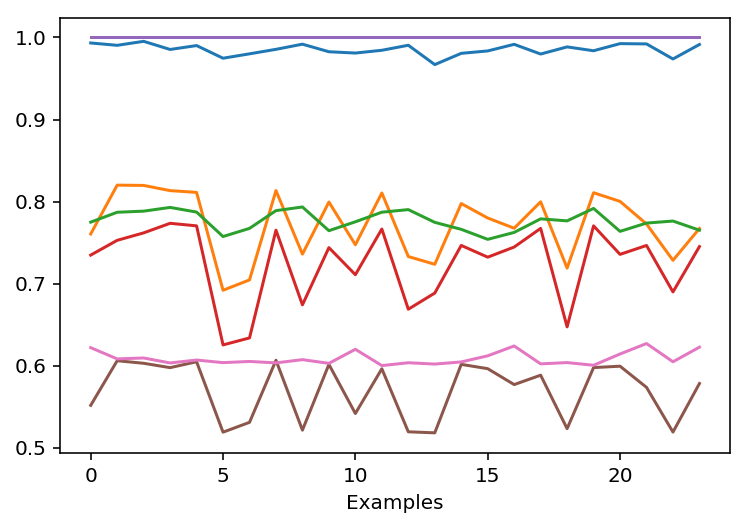

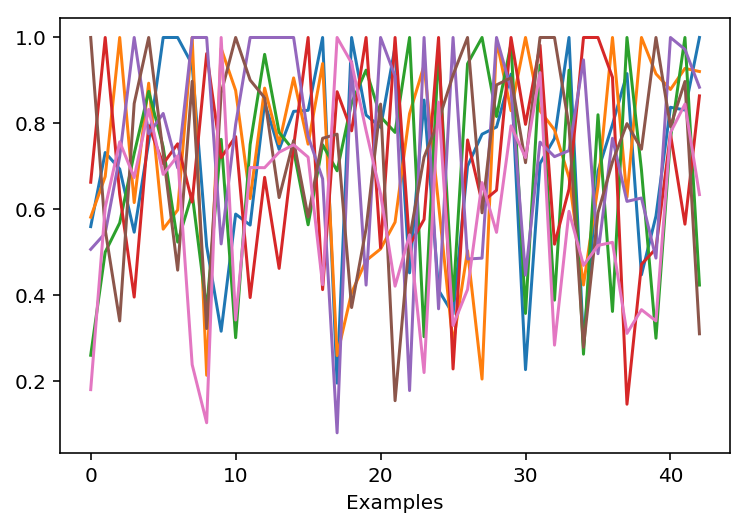

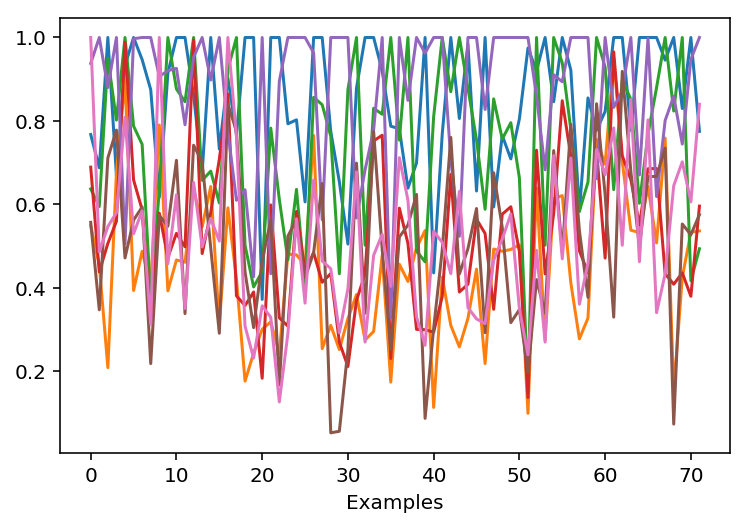

In [4]:
classes = list(set(y_test))
test_data = list(zip(x_test,y_test))
for label in classes:
    label_data = [tupple[0] for tupple in test_data if tupple[1] == label]
    plt.plot(label_data)
    plt.xlabel("Examples")
    plt.show()

In [5]:
svm_clf = svm.SVC(kernel="linear")
svm_clf.fit(x_train, y_train) 

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

k_nn = neighbors.KNeighborsClassifier(n_neighbors=1)
k_nn.fit(x_train, y_train)

bayes_clf = naive_bayes.MultinomialNB()
bayes_clf = bayes_clf.fit(x_train, y_train)

print(svm_clf,"\n",tree_clf,"\n",k_nn,"\n",bayes_clf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform') 
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [13]:
print(f"""Accuracy:
SVM: {svm_clf.score(x_test,y_test)}
Decision tree: {tree_clf.score(x_test,y_test)}
K-NN: {k_nn.score(x_test,y_test)}
Bayes: {bayes_clf.score(x_test,y_test)}""")

Accuracy:
SVM: 0.6704545454545454
Decision tree: 0.8125
K-NN: 0.6704545454545454
Bayes: 0.48863636363636365


In [14]:
loader.load_test()

[array([0.93562232, 0.78969957, 0.73819742, 0.73819742, 1.        ,
        0.69957082, 0.60944206])]

In [12]:
print(k_nn.predict(loader.load_test()))
print(svm_clf.predict(loader.load_test()))
print(tree_clf.predict(loader.load_test()))
print(bayes_clf.predict(loader.load_test()))

[1]
[1]
[3]
[3]


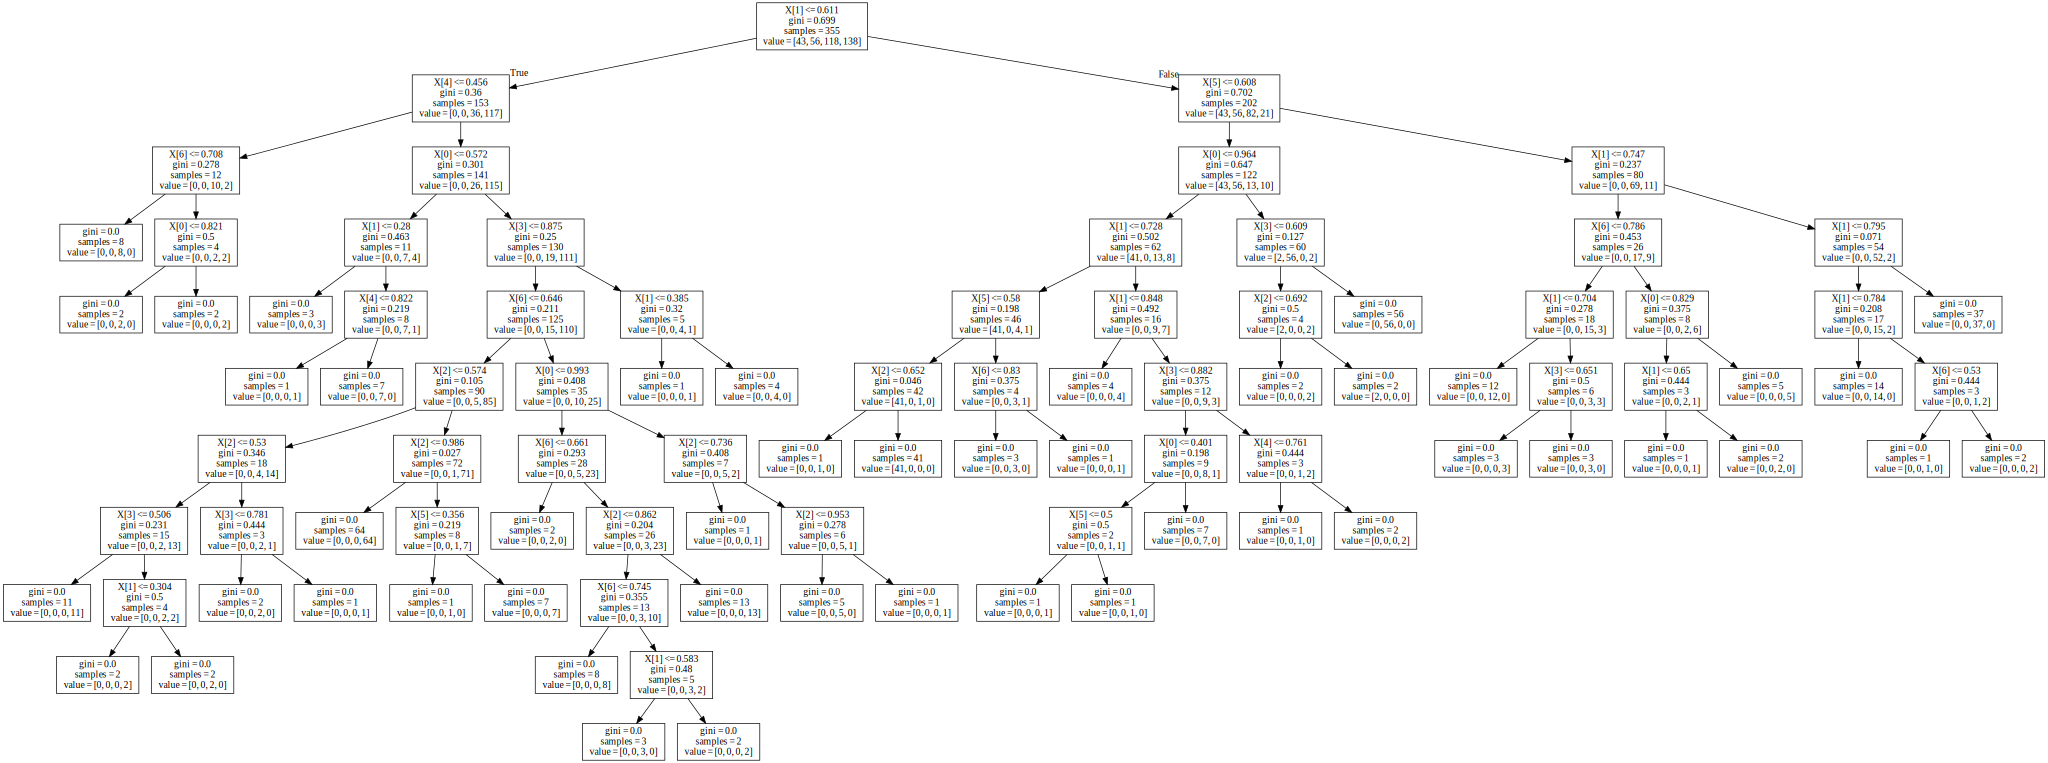

In [8]:
data = tree.export_graphviz(tree_clf,out_file=None)
graph = graphviz.Source(data)
graph

In [9]:
for i in range(1,60):
    k_nn = neighbors.KNeighborsClassifier(n_neighbors=i)
    k_nn.fit(x_train, y_train)
    print(f"k = {i}, acc = {k_nn.score(x_test,y_test)}")

k = 1, acc = 0.9034090909090909
k = 2, acc = 0.8465909090909091
k = 3, acc = 0.8693181818181818
k = 4, acc = 0.8636363636363636
k = 5, acc = 0.8806818181818182
k = 6, acc = 0.8636363636363636
k = 7, acc = 0.8693181818181818
k = 8, acc = 0.8465909090909091
k = 9, acc = 0.8636363636363636
k = 10, acc = 0.8522727272727273
k = 11, acc = 0.8295454545454546
k = 12, acc = 0.8352272727272727
k = 13, acc = 0.8238636363636364
k = 14, acc = 0.8295454545454546
k = 15, acc = 0.8238636363636364
k = 16, acc = 0.8125
k = 17, acc = 0.8068181818181818
k = 18, acc = 0.8125
k = 19, acc = 0.8011363636363636
k = 20, acc = 0.8011363636363636
k = 21, acc = 0.8068181818181818
k = 22, acc = 0.7897727272727273
k = 23, acc = 0.7897727272727273
k = 24, acc = 0.7897727272727273
k = 25, acc = 0.7840909090909091
k = 26, acc = 0.7840909090909091
k = 27, acc = 0.7727272727272727
k = 28, acc = 0.7556818181818182
k = 29, acc = 0.75
k = 30, acc = 0.75
k = 31, acc = 0.7443181818181818
k = 32, acc = 0.75
k = 33, acc = 0.732

In [10]:
for i in range(2,60):
    clf = tree.DecisionTreeClassifier(k_nn = i)
    clf.fit(x_train, y_train)
    print(f"k = {i}, acc = {clf.score(x_test,y_test)}")

TypeError: __init__() got an unexpected keyword argument 'k_nn'